In [1]:
import numpy as np

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
car_price = pd.read_csv('CarPrice.csv')

In [4]:
car_price

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130.0,mpfi,3.47,2.68,9.0,111.0,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,NaN,std,two,convertible,rwd,front,88.6,...,130.0,mpfi,3.47,2.68,9.0,NaN,5000,21,27,16500.0
2,3,1,NaN,gas,std,two,hatchback,rwd,front,94.5,...,152.0,mpfi,2.68,3.47,9.0,154.0,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109.0,mpfi,3.19,3.40,10.0,102.0,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136.0,mpfi,3.19,3.40,8.0,115.0,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141.0,mpfi,3.78,3.15,9.5,114.0,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141.0,mpfi,3.78,3.15,8.7,160.0,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173.0,mpfi,3.58,2.87,8.8,134.0,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145.0,idi,3.01,3.40,23.0,106.0,4800,26,27,22470.0


In [5]:
car_price.isna().sum()

car_ID              0
symboling           0
CarName             4
fueltype            1
aspiration          0
doornumber          1
carbody             0
drivewheel          0
enginelocation      0
wheelbase           1
carlength           1
carwidth            0
carheight           1
curbweight          0
enginetype          1
cylindernumber      1
enginesize          1
fuelsystem          1
boreratio           0
stroke              0
compressionratio    0
horsepower          2
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [12]:
for column in car_price.columns:
    if car_price[column].dtype =='object':
        car_price[column].fillna(car_price[column].mode()[0],inplace=True)
    else:
        car_price[column].fillna(car_price[column].mean(),inplace=True)

In [13]:
car_price.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [14]:
##label encoding
from sklearn.preprocessing import LabelEncoder
label_enc=LabelEncoder()
for column in car_price.columns:
    if car_price[column].dtype=='object':
        car_price[column]=label_enc.fit_transform(car_price[column])

In [16]:
car_price

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,1,1,0,1,0,2,0,88.6,...,130.0,5,3.47,2.68,9.0,111.000000,5000,21,27,13495.0
1,2,3,2,1,0,1,0,2,0,88.6,...,130.0,5,3.47,2.68,9.0,104.221675,5000,21,27,16500.0
2,3,1,82,1,0,1,2,2,0,94.5,...,152.0,5,2.68,3.47,9.0,154.000000,5000,19,26,16500.0
3,4,2,3,1,0,0,3,1,0,99.8,...,109.0,5,3.19,3.40,10.0,102.000000,5500,24,30,13950.0
4,5,2,4,1,0,0,3,0,0,99.4,...,136.0,5,3.19,3.40,8.0,115.000000,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,136,1,0,0,3,2,0,109.1,...,141.0,5,3.78,3.15,9.5,114.000000,5400,23,28,16845.0
201,202,-1,135,1,1,0,3,2,0,109.1,...,141.0,5,3.78,3.15,8.7,160.000000,5300,19,25,19045.0
202,203,-1,137,1,0,0,3,2,0,109.1,...,173.0,5,3.58,2.87,8.8,134.000000,5500,18,23,21485.0
203,204,-1,139,0,1,0,3,2,0,109.1,...,145.0,3,3.01,3.40,23.0,106.000000,4800,26,27,22470.0


In [17]:
#correlation matrix
corr_matrix=car_price.corr()
corr_matrix

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.151621,0.946732,-0.125568,0.067729,-0.179947,0.098303,0.051406,0.051483,0.127906,...,-0.038591,0.204898,0.260064,-0.160824,0.150276,-0.017785,-0.203789,0.015940,0.011255,-0.109093
symboling,-0.151621,1.000000,-0.101723,0.194311,-0.059866,0.671518,-0.596135,-0.041671,0.212471,-0.531892,...,-0.108744,0.091163,-0.130051,-0.008735,-0.178515,0.072782,0.273606,-0.035823,0.034606,-0.079978
CarName,0.946732,-0.101723,1.000000,-0.062741,0.008068,-0.146759,0.088220,-0.003712,0.053160,-0.007177,...,-0.168631,0.130412,0.151101,-0.181972,0.098051,-0.096650,-0.136467,0.110352,0.119761,-0.239766
fueltype,-0.125568,0.194311,-0.062741,1.000000,-0.401397,0.188496,-0.147853,-0.132257,0.040070,-0.307847,...,-0.068358,0.041529,-0.054451,-0.241829,-0.984356,0.165015,0.476883,-0.255963,-0.191392,-0.105679
aspiration,0.067729,-0.059866,0.008068,-0.401397,1.000000,-0.027213,0.063028,0.066465,-0.057191,0.256836,...,0.106469,0.288086,0.212614,0.222982,0.295541,0.240758,-0.183383,-0.202362,-0.254416,0.177926
doornumber,-0.179947,0.671518,-0.146759,0.188496,-0.027213,1.000000,-0.674155,0.104877,0.139129,-0.442273,...,-0.020406,0.031483,-0.112860,0.000884,-0.175274,0.134832,0.234021,0.009747,0.033154,-0.026711
carbody,0.098303,-0.596135,0.088220,-0.147853,0.063028,-0.674155,1.000000,-0.155745,-0.277009,0.402330,...,-0.066809,-0.065079,0.010549,-0.015325,0.136243,-0.154076,-0.109643,0.031697,-0.007170,-0.083976
drivewheel,0.051406,-0.041671,-0.003712,-0.132257,0.066465,0.104877,-0.155745,1.000000,0.147865,0.458819,...,0.522786,0.424686,0.481827,0.071591,0.127479,0.516294,-0.039417,-0.449581,-0.452220,0.577992
enginelocation,0.051483,0.212471,0.053160,0.040070,-0.057191,0.139129,-0.277009,0.147865,1.000000,-0.188080,...,0.196665,0.105971,0.185042,-0.138455,-0.019762,0.317935,0.198461,-0.153487,-0.102026,0.324973
wheelbase,0.127906,-0.531892,-0.007177,-0.307847,0.256836,-0.442273,0.402330,0.458819,-0.188080,1.000000,...,0.568205,0.382667,0.487693,0.162926,0.249388,0.348031,-0.359142,-0.470638,-0.544203,0.577338


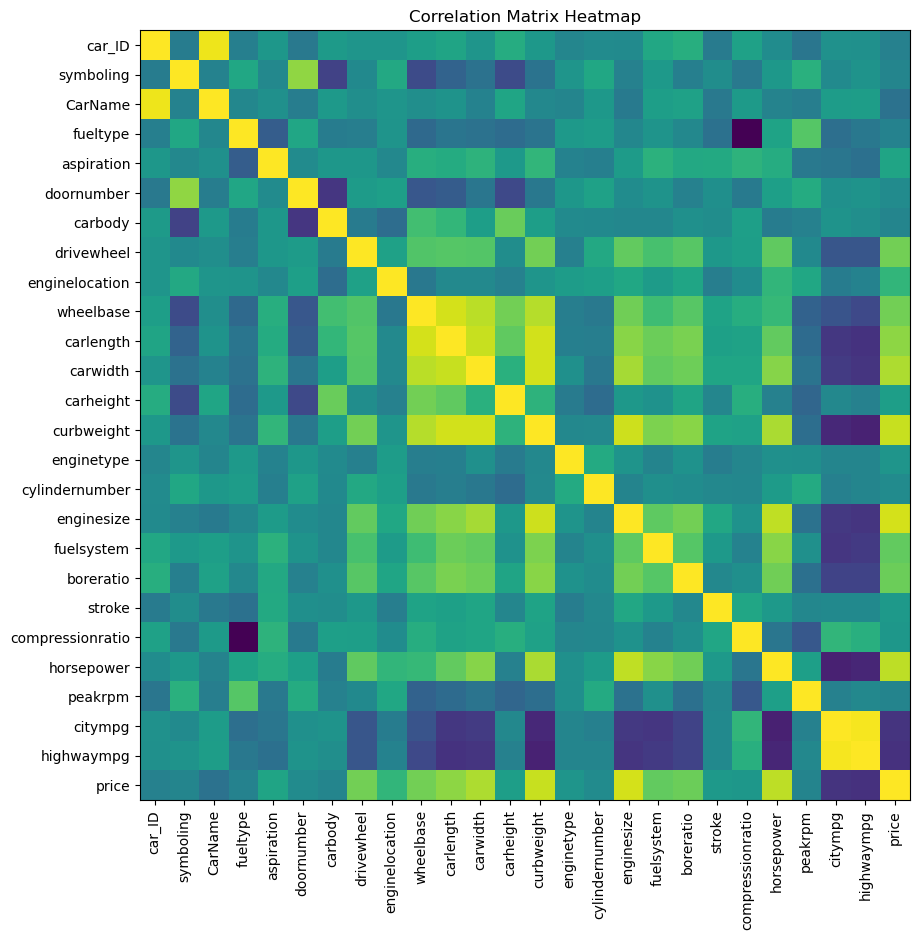

In [35]:
corr_matrix=car_price.corr()
plt.figure(figsize=(12, 10))
plt.imshow(corr_matrix)
plt.title('Correlation Matrix Heatmap')
plt.xticks(range(len(corr_matrix)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix)), corr_matrix.index)
plt.show()

In [19]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [20]:
X = car_price[[ 'CarName',  'carlength']]
y =car_price['price']

In [21]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2,random_state=42)

In [22]:
lr=LinearRegression()

In [23]:
lr.fit(X_train,y_train)

LinearRegression()

In [24]:
lr.coef_

array([-40.10488961, 417.95642067])

In [25]:
lr.intercept_

-56482.12186809198

In [26]:
y_pred=lr.predict(X_test)

In [27]:
y_pred

array([22030.38296375, 17716.97806853, 12943.54986633, 17578.26704783,
       22664.0806046 ,  9884.01423313,  8532.28325366,  8131.23435758,
       11701.98904094, 10227.77947078, 13579.88459846,  9334.85421524,
       14614.90237961, 12218.75351788, 29812.82615056,  5315.70956694,
        -797.07185904, 13301.11236789, 12926.64234174, 11315.68374758,
       15664.86568867, 16733.42727478,  8706.97324541,  2510.60053529,
        8179.5910843 , 23996.46889337, 12670.05181832, 17013.89025781,
       11646.19420979, 16973.7853682 , 22583.87082538,  5693.0879286 ,
        9873.12530474, 16933.6804786 ,  6856.12972723, 21283.13366392,
       11155.26418915, 12147.26874519,  6952.77386163, 13381.32214711,
       11742.09393055])

In [28]:
X = car_price[['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 
               'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype', 
               'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 
               'horsepower', 'peakrpm', 'citympg', 'highwaympg']]
y = car_price['price']

In [29]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2,random_state=42)

In [30]:
lr.fit(X_train,y_train)

LinearRegression()

In [32]:
lr.intercept_

-72318.67174525754

In [33]:
y_pred=lr.predict(X_test)

In [34]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Square Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')

Mean Square Error: 12933877.844173064
Root Mean Squared Error: 3596.3700927703567
R-squared: 0.8361639336322952
